# Analyse de la couverture spatiale

In [28]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from sim_safran_lon_lat_to_json import locate_safran_points_geojson, load_csv_and_create_datarame, filter_by_date, convert_lambert2_to_long_lat



In [29]:
# Récupère le répertoire du script (ou du notebook)
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd()

# Définition du répertoire de base pour les données
base_data_dir = os.path.join(script_dir, "..", "public", "data")

# Construction des chemins à partir de base_data_dir
csv_compress = os.path.join(base_data_dir, "QUOT_SIM2_previous-2020-202412.csv.gz")
centroid_geojson_json = os.path.join(base_data_dir, "centroid_coordinates_SIM_LON_LAT.json")
geojson_path = os.path.join(base_data_dir, "FRANCE_DOM_GEOJSON", "arrondissements-avec-outre-mer.geojson")
# Définition des dates
start_date = "2024-01-01"
end_date   = "2024-12-31"

In [30]:
# csv_compress = os.path.join(script_dir, "..", "public", "data", "QUOT_SIM2_previous-2020-202412.csv.gz")
# centroid_geojson_json = "public/data/centroid_coordinates_SIM_LON_LAT.json"
# geojson_path = "public/data/FRANCE_DOM_GEOJSON/arrondissements-avec-outre-mer.geojson"
# start_date = "2024-01-01" 
# end_date   = "2024-12-31"
# output_folder = 'public/data/FR-ID-JSON_TEST_SIM_LON_LAT'

In [31]:
# 1. Chargement des données CSV combinées
df_preci = load_csv_and_create_datarame(csv_compress)
# 2. Filtrage temporel
df_preci_filter = filter_by_date(df_preci, start_date, end_date)
# 3.  Conversion en longitude et altitude
df_preci_conv = convert_lambert2_to_long_lat(df_preci_filter)
# 4. Filtrage spatial : conserver uniquement les enregistrements en France
gdf_fr, df_coord1, df_preci_fr1 = locate_safran_points_geojson(df_preci_conv, geojson_path, centroid_geojson_json)

   LAMBX  LAMBY       DATE  PRENEI_Q  PRELIQ_Q  PE_Q
0    600  24010 2020-01-01       0.0       0.4   0.3
1    600  24010 2020-01-02       0.0       0.6  -0.1
2    600  24010 2020-01-03       0.0       0.8  -0.2
3    600  24010 2020-01-04       0.0       0.0  -0.1
4    600  24010 2020-01-05       0.0       0.0  -0.3
          LAMBX  LAMBY    LON     LAT       DATE  PRENEI_Q  PRELIQ_Q  PE_Q
14452212    600  24010 -4.962  48.382 2024-01-01       0.0      19.1  15.9
14452213    600  24010 -4.962  48.382 2024-01-02       0.0       8.4   5.3
14452214    600  24010 -4.962  48.382 2024-01-03       0.0       6.0   4.2
14452215    600  24010 -4.962  48.382 2024-01-04       0.0      14.8  12.5
14452216    600  24010 -4.962  48.382 2024-01-05       0.0       3.1   1.8
   LAMBX  LAMBY    LON     LAT       DATE  PRENEI_Q  PRELIQ_Q  PE_Q  GID
0    760  23610 -4.699  48.037 2024-01-01       0.0      23.5  22.0    1
1    760  23610 -4.699  48.037 2024-01-02       0.0       3.3   1.9    1
2    760  236

In [32]:
gdf_fr

,code,nom,geometry
0,01001,Belley,"POLYGON ((5.12174 45.81118, 5.12665 45.81392, ..."
1,01002,Bourg-en-Bresse,"POLYGON ((4.98022 46.5152, 4.98355 46.51539, 4..."
2,01003,Gex,"POLYGON ((6.06401 46.41623, 6.0673 46.41494, 6..."
3,01004,Nantua,"POLYGON ((5.63746 46.33644, 5.64007 46.33884, ..."
4,02001,Château-Thierry,"POLYGON ((3.07188 49.11755, 3.07224 49.11832, ..."
...,...,...,...
323,95003,Pontoise,"POLYGON ((1.70436 49.2322, 1.70515 49.23427, 1..."
324,97401,Saint-Denis,"POLYGON ((55.62867 -20.91056, 55.63082 -20.912..."
325,97402,Saint-Pierre,"MULTIPOLYGON (((55.56891 -21.3767, 55.56843 -2..."
326,97403,Saint-Benoît,"POLYGON ((55.62867 -20.91056, 55.63525 -20.912..."


In [33]:
df_preci

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,PE_Q
0,600,24010,2020-01-01,0.0,0.4,0.3
1,600,24010,2020-01-02,0.0,0.6,-0.1
2,600,24010,2020-01-03,0.0,0.8,-0.2
3,600,24010,2020-01-04,0.0,0.0,-0.1
4,600,24010,2020-01-05,0.0,0.0,-0.3
...,...,...,...,...,...,...
18072679,11960,17450,2024-12-27,0.0,0.0,-1.6
18072680,11960,17450,2024-12-28,0.0,0.0,-1.3
18072681,11960,17450,2024-12-29,0.0,0.0,-1.2
18072682,11960,17450,2024-12-30,0.0,0.0,-0.9


In [34]:
df_coord1

,GID,LON,LAT
0,1,-4.699,48.037
1,2,-4.747,48.395
2,3,-4.757,48.467
3,4,-4.592,48.043
4,5,-4.620,48.258
...,...,...,...
8591,8592,9.477,42.469
8592,8593,9.486,42.540
8593,8594,9.529,42.104
8594,8595,9.538,42.176


In [35]:
df_preci_fr1


,LAMBX,LAMBY,LON,LAT,DATE,PRENEI_Q,PRELIQ_Q,PE_Q,GID
0,760,23610,-4.699,48.037,2024-01-01,0.0,23.5,22.0,1
1,760,23610,-4.699,48.037,2024-01-02,0.0,3.3,1.9,1
2,760,23610,-4.699,48.037,2024-01-03,0.0,5.7,4.6,1
3,760,23610,-4.699,48.037,2024-01-04,0.0,13.5,12.4,1
4,760,23610,-4.699,48.037,2024-01-05,0.0,2.1,1.5,1
...,...,...,...,...,...,...,...,...,...
3146131,11960,17210,9.547,42.247,2024-12-27,0.0,0.0,-1.6,8596
3146132,11960,17210,9.547,42.247,2024-12-28,0.0,0.0,-1.4,8596
3146133,11960,17210,9.547,42.247,2024-12-29,0.0,0.0,-1.3,8596
3146134,11960,17210,9.547,42.247,2024-12-30,0.0,0.0,-0.9,8596


In [36]:
from sim_safran_lamb_to_json import locate_safran_points_csv, load_csv_and_create_datarame, filter_by_date
csv_grid_safran_path = os.path.join(base_data_dir, "coordonnees_grille_safran_lambert-2-etendu.csv")
centroid_csv_json = os.path.join(base_data_dir, "centroid_coordinates_SIM_LAMBX_LAMBY.json")
output_folder = os.path.join(base_data_dir, "FR-ID-JSON_SIM_LAMBX_LAMBY")

# Définition des dates
start_date = "2024-01-01"
end_date   = "2024-12-31"

In [37]:

# 1. Chargement des données CSV combinées
df_preci,  df = load_csv_and_create_datarame(csv_compress)
# 2.Filtrage temporel pour ne conserver que les enregistrements entre start_date et end_date.
df_preci_filter = filter_by_date(df_preci, start_date, end_date)
df_coord, df_preci_fr = locate_safran_points_csv(df_preci_filter, csv_grid_safran_path, centroid_csv_json)

   LAMBX  LAMBY       DATE  PRENEI_Q  PRELIQ_Q  PE_Q
0    600  24010 2020-01-01       0.0       0.4   0.3
1    600  24010 2020-01-02       0.0       0.6  -0.1
2    600  24010 2020-01-03       0.0       0.8  -0.2
3    600  24010 2020-01-04       0.0       0.0  -0.1
4    600  24010 2020-01-05       0.0       0.0  -0.3
      LAMBX (hm)  LAMBY (hm)   LAT_DG   LON_DG
0            600       24010  48.3822 -4.96118
1            760       24170  48.5386 -4.76561
2            760       24090  48.4670 -4.75585
3            760       24010  48.3953 -4.74612
4            760       23930  48.3237 -4.73641
...          ...         ...      ...      ...
9887       11960       17290  42.3189  9.55634
9888       11960       17210  42.2473  9.54748
9889       11960       17130  42.1758  9.53863
9890       11960       17050  42.1043  9.52981
9891       11960       16970  42.0328  9.52101

[9892 rows x 4 columns]


In [38]:
df_coord

,GID,LAMBX,LAMBY,LAT_DG,LON_DG
0,1,600,24010,48.3822,-4.96118
1,2,760,24170,48.5386,-4.76561
2,3,760,24090,48.4670,-4.75585
3,4,760,24010,48.3953,-4.74612
4,5,760,23930,48.3237,-4.73641
...,...,...,...,...,...
9887,9888,11960,17290,42.3189,9.55634
9888,9889,11960,17210,42.2473,9.54748
9889,9890,11960,17130,42.1758,9.53863
9890,9891,11960,17050,42.1043,9.52981


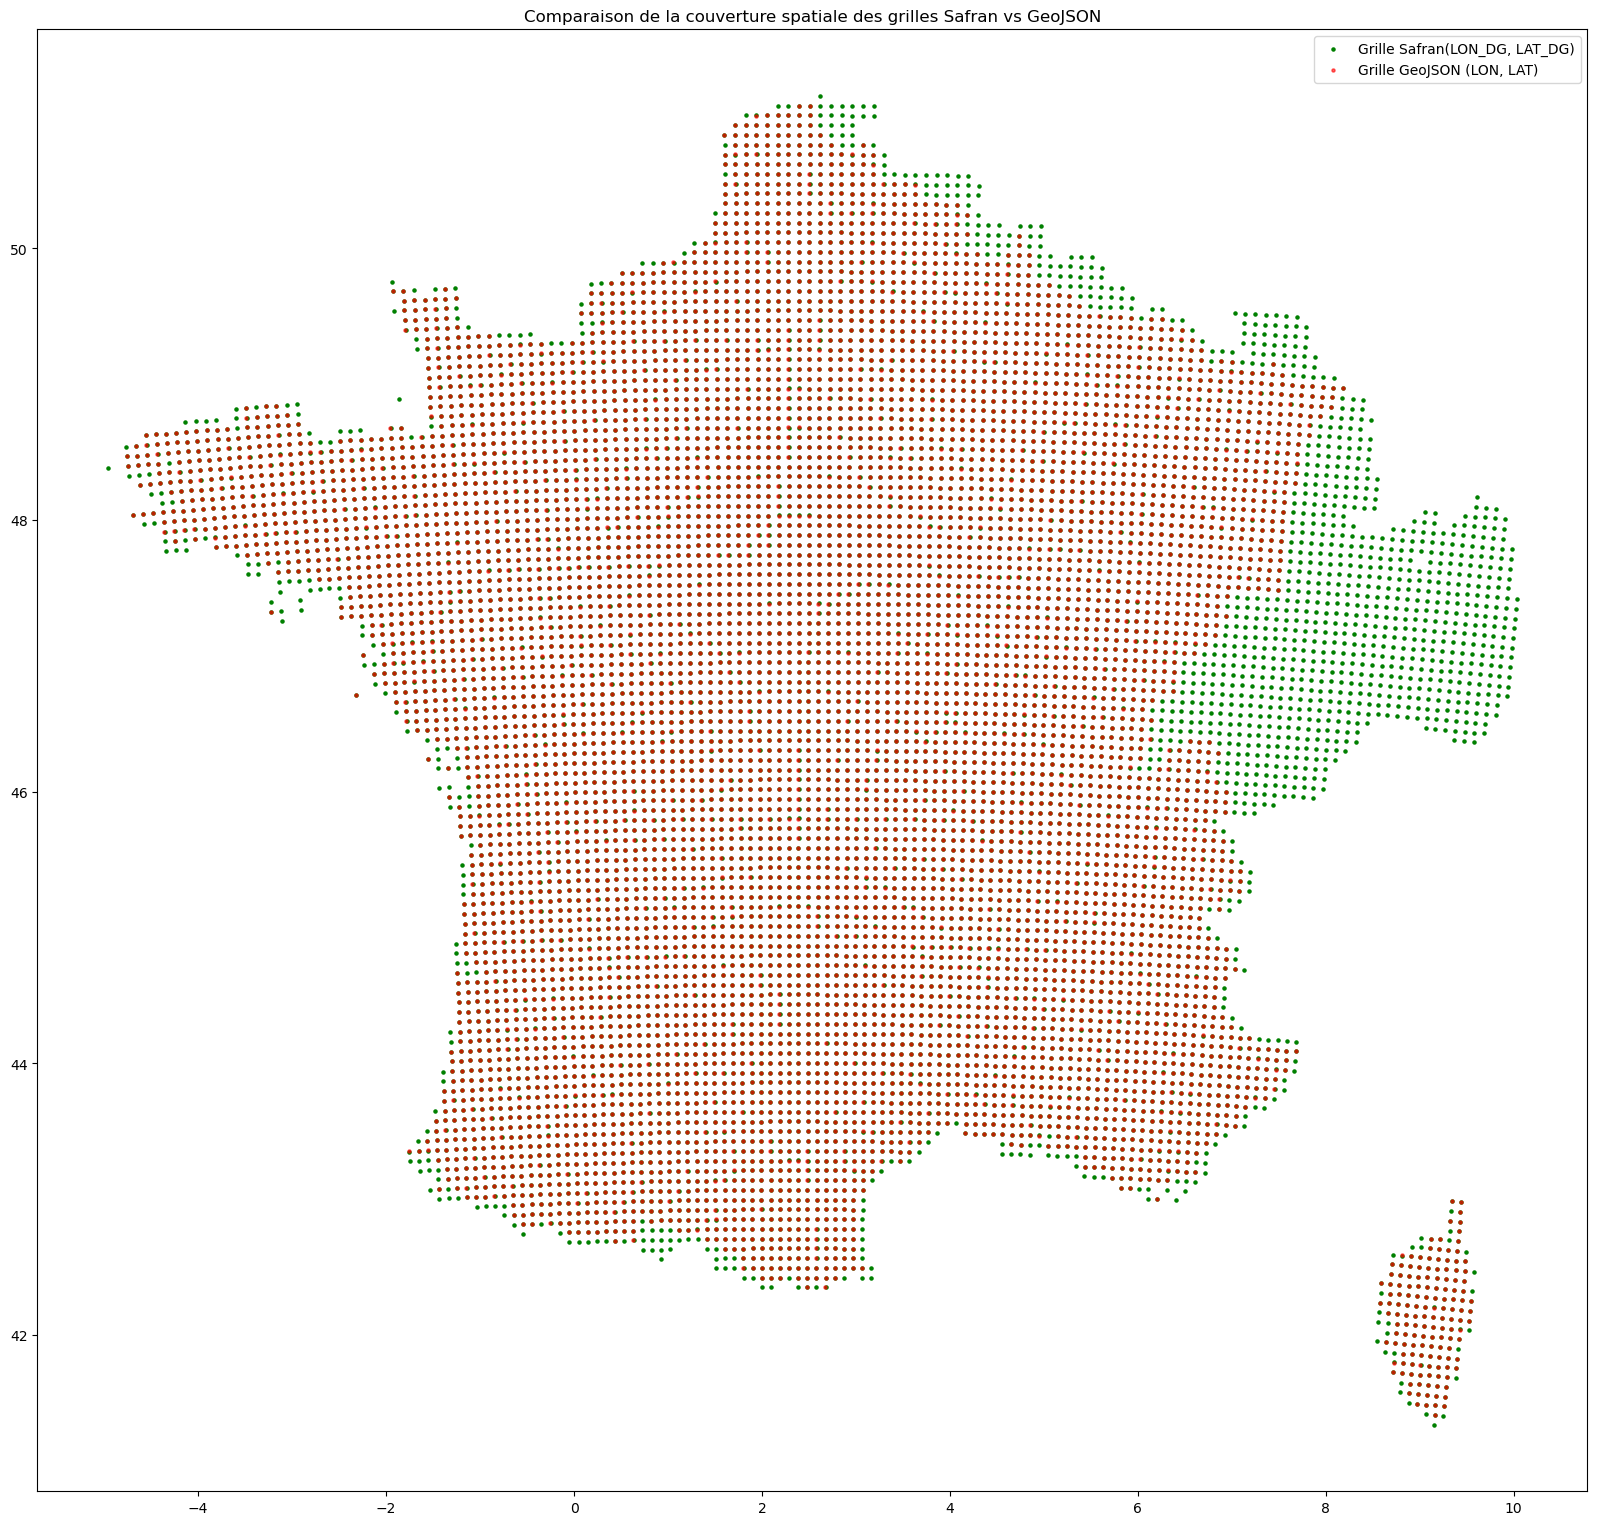

In [ ]:
# Tracer les polygones du GeoJSON (limites des régions)
fig, ax = plt.subplots(figsize=(20, 20))
#gdf_fr.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', label="Polygon GeoJSON")


# # Tracer les points de la grille Safran
# df_safran_gdf = gpd.GeoDataFrame(df_coord, geometry=gpd.points_from_xy(df_coord['LAT_DG'], df_coord['LON_DG']), crs="EPSG:4326")
# df_safran_gdf = df_safran_gdf.to_crs("EPSG:4326")
# print(df_safran_gdf)
# df_safran_gdf.plot(ax=ax, color='red', markersize=2, label="Safran")

# Tracer les points de la grille Safran (LON_DG, LAT_DG)
df_geojson_gdf = gpd.GeoDataFrame(df_coord, geometry=gpd.points_from_xy(df_coord['LON_DG'], df_coord['LAT_DG']), crs="EPSG:4326")
df_geojson_gdf.plot(ax=ax, color='green', markersize=10, label="Grille Safran(LON_DG, LAT_DG)")


# Tracer les points de la grille GeoJSON(LON, LAT)
df_geojson_gdf = gpd.GeoDataFrame(df_coord1, geometry=gpd.points_from_xy(df_coord1['LON'], df_coord1['LAT']), crs="EPSG:4326")
df_geojson_gdf.plot(ax=ax, color='red', alpha=0.6, markersize=5, label="Grille GeoJSON (LON, LAT)")

plt.legend()
plt.title("Comparaison de la couverture spatiale des grilles Safran vs GeoJSON")
plt.show()
